First import the csv data from previous step: Immo-eliza- Data-Scraper, we could import the data by copy past in the new project or collect the url from previous project to stay up to date white the date

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#We want to us previous data (so link) from scraper, so if that updates, this will to.
root_url = "https://raw.githubusercontent.com/CarolineVHK/immo-eliza-scraping-Python_Pricers/main/data/all_property_details.csv"
data = pd.read_csv(root_url)
print("This is an example of the raw data we would handle.")
data.head()

This is an example of the raw data we would handle.


,ID,Street,HouseNumber,Box,Floor,City,PostalCode,Region,District,Province,...,Garden,GardenArea,Facades,SwimmingPool,Condition,EPCScore,Latitude,Longitude,PropertyUrl,Property url
0,11132404,Rue de Sart,76,NaN,NaN,COURT-SAINT-ETIENNE,1490,WALLONIE,Nivelles,Walloon Brabant,...,1.0,1333.0,4.0,NaN,JUST_RENOVATED,D,50.624459,4.562738,NaN,https://www.immoweb.be/en/classified/house/for...
1,10820901,Rue de Trisogne,15,D,NaN,Ciney,5590,WALLONIE,Dinant,Namur,...,NaN,736.0,3.0,NaN,AS_NEW,A,50.281860,5.167839,NaN,https://www.immoweb.be/en/classified/villa/for...
2,11080049,Chauss�e de Mons,747,NaN,NaN,Anderlecht,1070,BRUSSELS,Brussels,Brussels,...,NaN,91.0,2.0,0.0,TO_BE_DONE_UP,F,50.829926,4.307101,NaN,https://www.immoweb.be/en/classified/house/for...
3,11137923,Braambezielaan,10,NaN,NaN,Gent Wondelgem,9032,FLANDERS,Gent,East Flanders,...,1.0,261.0,2.0,0.0,AS_NEW,D,51.080022,3.702782,NaN,https://www.immoweb.be/en/classified/house/for...
4,11139236,Lindanusstraat,39,NaN,NaN,Dendermonde,9200,FLANDERS,Dendermonde,East Flanders,...,1.0,215.0,2.0,NaN,TO_BE_DONE_UP,E,51.028484,4.103270,NaN,https://www.immoweb.be/en/classified/mansion/f...


Now that we have the raw data we want to see which data is missing, which data we want to use and how we want to use it. 

In [26]:
#overview columns with missing data
data.isna().sum()

ID                      0
Street               2659
HouseNumber          2906
Box                 14462
Floor                9782
City                    0
PostalCode              0
Region                  0
District                0
Province                0
PropertyType            0
PropertySubType         0
Price                   0
SaleType                0
ConstructionYear     4326
BedroomCount            0
LivingArea            518
KitchenType          5231
Furnished           10991
Fireplace               0
Terrace              6363
TerraceArea         10076
Garden              13458
GardenArea           8827
Facades              4642
SwimmingPool        10683
Condition            3814
EPCScore             2218
Latitude             2662
Longitude            2662
PropertyUrl         18598
Property url            0
dtype: int64

Checking for duplicates

In [27]:
#Find duplicates:
duplicates = data[data.duplicated()]
    #print("Those are the duplicates : \n", duplicates['ID'])
    #print("There are, ", (duplicates.count()), "duplicates.")
#Remove duplicates:
data_remove_dup = data.drop_duplicates(duplicates)
print(data_remove_dup)

             ID                   Street HouseNumber  Box  Floor  \
0      11132404              Rue de Sart          76  NaN    NaN   
1      10820901          Rue de Trisogne          15    D    NaN   
2      11080049         Chauss�e de Mons         747  NaN    NaN   
3      11137923           Braambezielaan          10  NaN    NaN   
4      11139236           Lindanusstraat          39  NaN    NaN   
...         ...                      ...         ...  ...    ...   
18591  11016443            Waterhoenlaan          14    1    1.0   
18592  10888214  Jaak Van Buggenhoutlaan         20A  NaN    2.0   
18593  11018701            Avenue d'Aout          14  NaN    1.0   
18594  11038008   Rue Marcel Thiry 4/203         NaN    0    3.0   
18595  11016442            Waterhoenlaan          14    1    1.0   

                       City  PostalCode    Region     District  \
0       COURT-SAINT-ETIENNE        1490  WALLONIE     Nivelles   
1                     Ciney        5590  WALLONIE  

In [28]:
#check duplicates gone
duplicates_check = data_remove_dup[data_remove_dup.duplicated()]
print(duplicates_check)

Empty DataFrame
Columns: [ID, Street, HouseNumber, Box, Floor, City, PostalCode, Region, District, Province, PropertyType, PropertySubType, Price, SaleType, ConstructionYear, BedroomCount, LivingArea, KitchenType, Furnished, Fireplace, Terrace, TerraceArea, Garden, GardenArea, Facades, SwimmingPool, Condition, EPCScore, Latitude, Longitude, PropertyUrl, Property url]
Index: []

[0 rows x 32 columns]


cleaning data é, â,  is changed into ?
1. do it like a function in the previous step while scraping and befor putting it into the dictionary
--> DONOT change afterwards, a broken file can't be fixed without source data


In [29]:
# data = None
# #list of encoding types:
# encodings = ['utf-8', 'latin1', 'iso-8859-1']
# #read file trought encoding
# for encoding in encodings:
#     try:
#         data = pd.read_csv(root_url, encoding=encoding)
#         print("Successfully read using encoding:", encoding)
#         break
#     except Exception as e:
#         print("Error reading with encoding {}: {}".format(encoding, e))
# if data is not None:
#     data_clean_special_characters = 'new_data.csv'
#     data.to_csv(data_clean_special_characters, index=False)
#     print("New CSV file '{}' created successfully.".format(data_clean_special_characters))

Checking wich data we have scraped and what I want to visualize:

In [30]:
print(" -- What columns do I have: -- ")
data.columns

 -- What columns do I have: -- 


Index(['ID', 'Street', 'HouseNumber', 'Box', 'Floor', 'City', 'PostalCode',
       'Region', 'District', 'Province', 'PropertyType', 'PropertySubType',
       'Price', 'SaleType', 'ConstructionYear', 'BedroomCount', 'LivingArea',
       'KitchenType', 'Furnished', 'Fireplace', 'Terrace', 'TerraceArea',
       'Garden', 'GardenArea', 'Facades', 'SwimmingPool', 'Condition',
       'EPCScore', 'Latitude', 'Longitude', 'PropertyUrl', 'Property url'],
      dtype='object')

In [31]:
print(" -- What's inside EPCScore: -- ")
data["EPCScore"].unique()

 -- What's inside EPCScore: -- 


array(['D', 'A', 'F', 'E', 'C', 'B', 'G', nan, 'A+', 'A++', 'A+_A++',
       'A_A+'], dtype=object)

In [32]:
print(" -- What's inside Region: -- ")
data["Region"].unique()

 -- What's inside Region: -- 


array(['WALLONIE', 'BRUSSELS', 'FLANDERS'], dtype=object)

In [33]:
print(" -- What's inside District: -- ")
data["District"].unique()

 -- What's inside District: -- 


array(['Nivelles', 'Dinant', 'Brussels', 'Gent', 'Dendermonde',
       'Mechelen', 'Li�ge', 'Leuven', 'Oudenaarde', 'Marche-en-Famenne',
       'Antwerp', 'Sint-Niklaas', 'Arlon', 'Neufch�teau', 'Waremme',
       'Verviers', 'Huy', 'Halle-Vilvoorde', 'Bastogne', 'Aalst',
       'Oostend', 'Soignies', 'Brugge', 'Tielt', 'Charleroi', 'Thuin',
       'Virton', 'Kortrijk', 'Mons', 'Turnhout', 'Tournai', 'Namur',
       'Roeselare', 'Mouscron', 'Maaseik', 'Ath', 'Tongeren', 'Eeklo',
       'Veurne', 'Hasselt', 'Philippeville', 'Ieper', 'Diksmuide'],
      dtype=object)

In [34]:
print(" -- What's inside PropertyType: -- ")
data["PropertyType"].unique()

 -- What's inside PropertyType: -- 


array(['HOUSE', 'APARTMENT'], dtype=object)

In [35]:
print(" -- What's inside PropertySubType: -- ")
data["PropertySubType"].unique()

 -- What's inside PropertySubType: -- 


array(['HOUSE', 'VILLA', 'MANSION', 'APARTMENT_BLOCK',
       'MIXED_USE_BUILDING', 'EXCEPTIONAL_PROPERTY', 'TOWN_HOUSE',
       'MANOR_HOUSE', 'BUNGALOW', 'COUNTRY_COTTAGE', 'FARMHOUSE',
       'CASTLE', 'OTHER_PROPERTY', 'CHALET', 'APARTMENT', 'PENTHOUSE',
       'DUPLEX', 'FLAT_STUDIO', 'SERVICE_FLAT', 'TRIPLEX', 'KOT',
       'GROUND_FLOOR', 'LOFT'], dtype=object)

In [36]:
print(" -- What's inside Facades: -- ")
data["Facades"].unique()

 -- What's inside Facades: -- 


array([ 4.,  3.,  2., nan,  1.,  8.,  6.,  5.])

In [37]:
print(" -- What's inside Condition: -- ")
data["Condition"].unique()

 -- What's inside Condition: -- 


array(['JUST_RENOVATED', 'AS_NEW', 'TO_BE_DONE_UP', 'GOOD', 'TO_RENOVATE',
       nan, 'TO_RESTORE'], dtype=object)

In [5]:
#Modules needed:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#source used:
data = pd.read_csv('../src/cleaned/cleaned_data.csv')

Start with relationships from data:
1. Price vs Condition

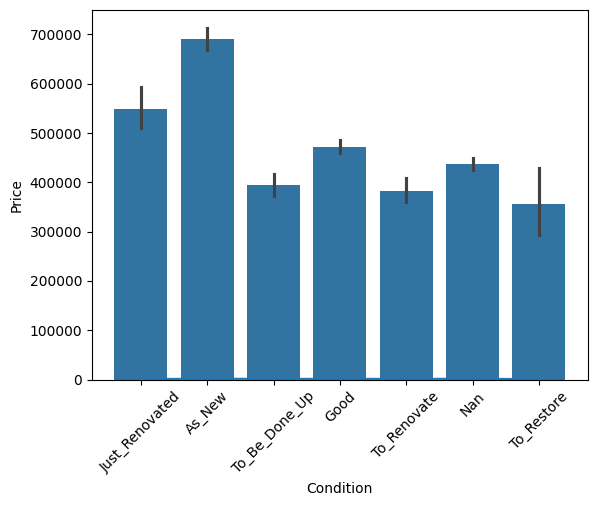

In [6]:

sns.barplot(data=data, x="Condition",y="Price")
plt.xticks(rotation=45)
sns.lineplot(data=data, x="Condition", y="ConstructionYear")
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

1.b Price per Condition vs relation with ConstructionYear

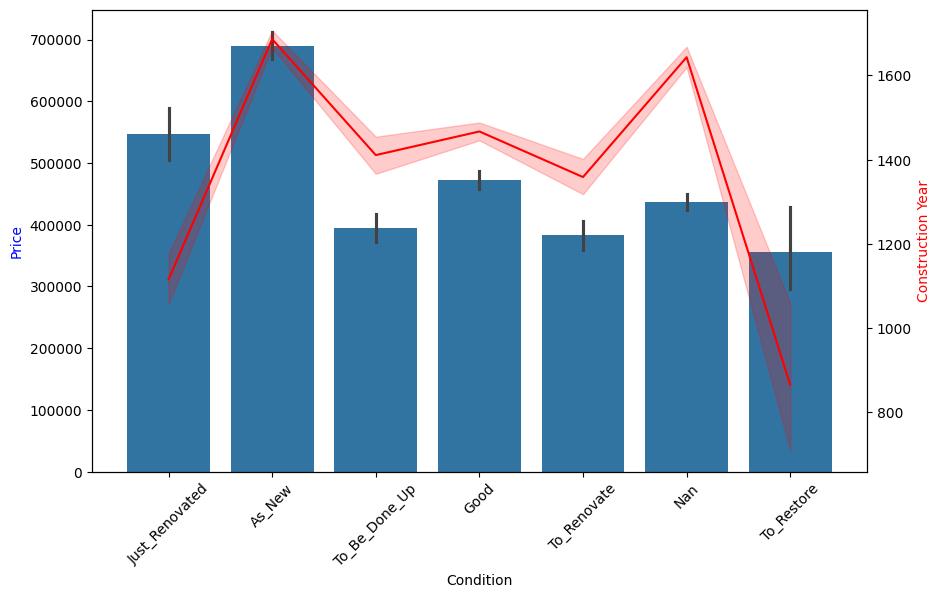

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data, x="Condition", y="Price", ax=ax)
ax.set_ylabel("Price", color='b')
plt.xticks(rotation=45)

ax2 = ax.twinx()
sns.lineplot(data=data, x="Condition", y="ConstructionYear", color='red', ax=ax2)
ax2.set_ylabel("Construction Year", color="r")

ax2.ticklabel_format(style='plain', axis='y')

plt.show()

2. Price per Region

In [81]:

average_price = data.groupby('Region','Province')['Price'].mean().reset_index()
print(average_price)
#sns.barplot(data=average_price, x="Region", y="Price", color="green")

#customize plt
# plt.xlabel('Region')
# plt.ylabel('Average Price')
# plt.title('Average Price per Region')
# plt.show()

ValueError: No axis named Province for object type DataFrame

Specify per Province

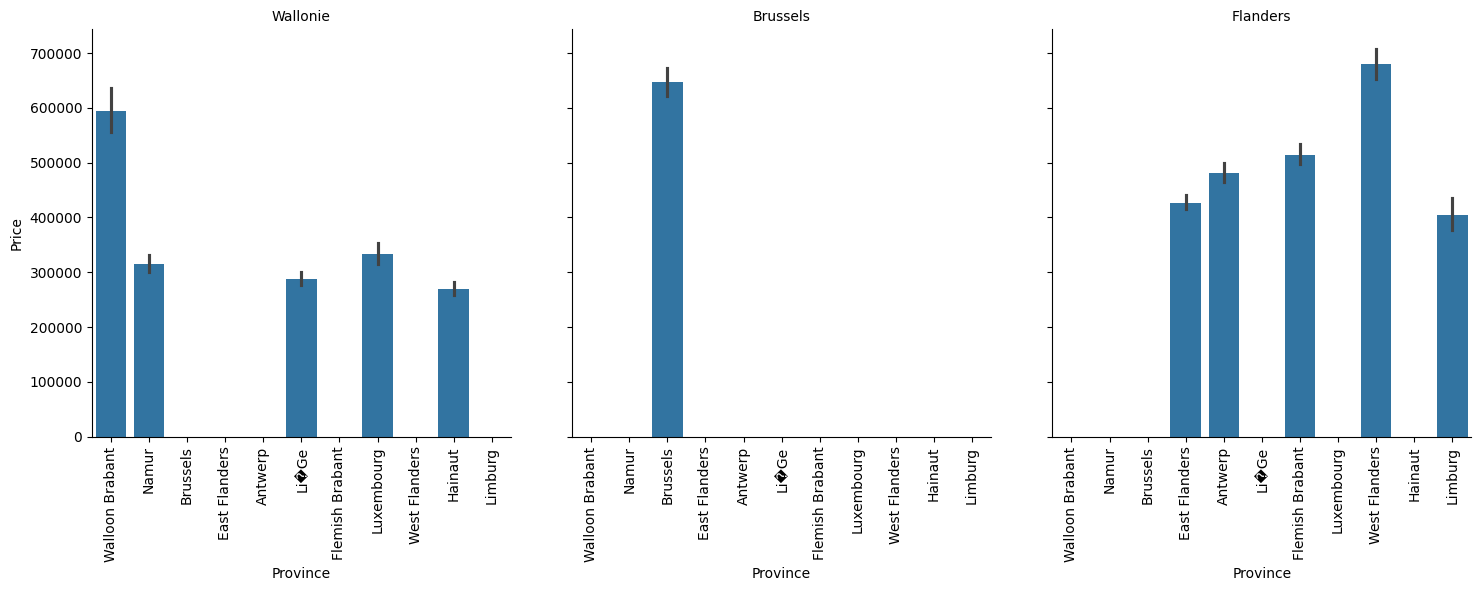

In [60]:
v = sns.FacetGrid(data, col="Region", col_wrap=3, height=5)
v.map(sns.barplot, "Province", "Price", order=data['Province'].unique())
v.set_xticklabels(rotation=90)
v.set_titles("{col_name}")

plt.show()

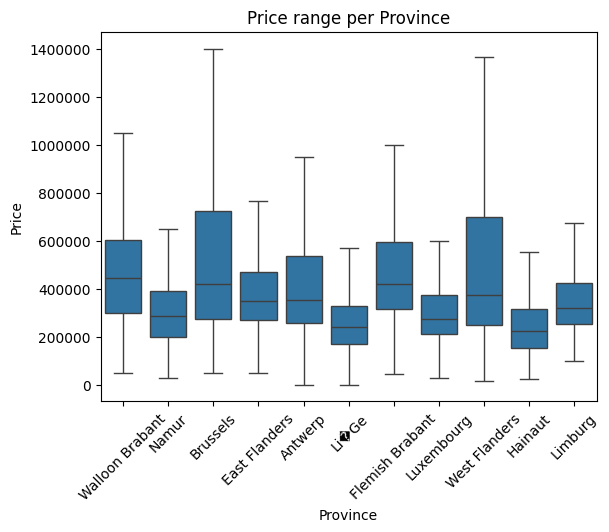

In [71]:

sns.boxplot(x='Province', y='Price', data=data, showfliers=False)

plt.xticks(rotation=45)
plt.title('Price range per Province')
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

3. Price vs EPCScore

4. Price vs LivindArea

<function matplotlib.pyplot.show(close=None, block=None)>

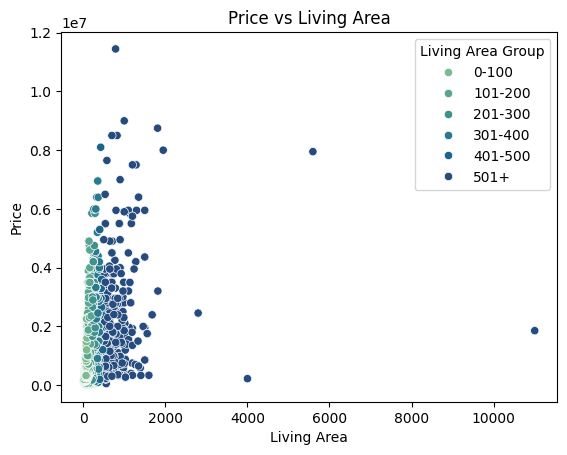

In [22]:
#defining bins and label for in new column:
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-100', '101-200', '201-300','301-400', '401-500', '501+']
assert len(labels) == len(bins) - 1
#make a new column: categorising Living Area
data["LivingAreaCat"] = pd.cut(data['LivingArea'],bins=bins, labels=labels)
sns.scatterplot(data=data, x="LivingArea", y="Price", hue='LivingAreaCat',palette='crest')

#customize plt
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Price vs Living Area')
plt.legend(title='Living Area Group')
plt.show()

There are outliners:
we want to remove those by:
1. looking for the data LivingArea > 3000
2. delete this data (we don't need it)
3. show plot again with removed data

In [24]:
data[data['LivingArea']>3000]


,Unnamed: 0,ID,City,PostalCode,Region,District,Province,PropertyType,PropertySubType,Price,...,Garden,GardenArea,Facades,SwimmingPool,Condition,EPCScore,Latitude,Longitude,Property url,LivingAreaCat
5259,5264,10606416,Faimes,4317,Wallonie,Waremme,Li�Ge,House,Castle,1850000,...,0,50000,4,0,Good,E,50,5,Https://Www.Immoweb.Be/En/Classified/Castle/Fo...,501+
7100,7108,11026468,Bl�Gny,4670,Wallonie,Li�Ge,Li�Ge,House,House,215000,...,1,400,3,0,To_Restore,F,50,5,Https://Www.Immoweb.Be/En/Classified/House/For...,501+
9664,9695,11066133,Li�Ge,4000,Wallonie,Li�Ge,Li�Ge,House,Exceptional_Property,7950000,...,0,0,2,0,To_Renovate,Nan,50,5,Https://Www.Immoweb.Be/En/Classified/Exception...,501+


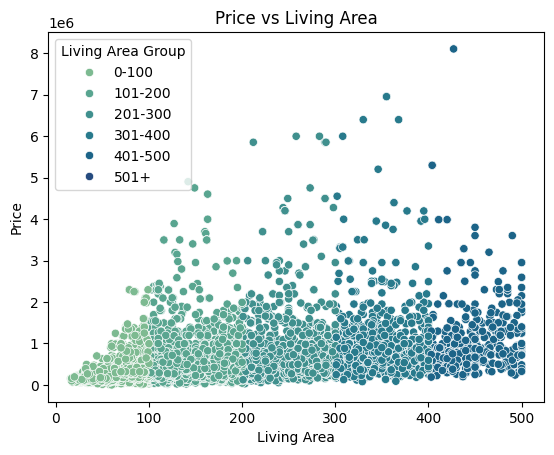

In [35]:
#defining bins and label for in new column:
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-100', '101-200', '201-300','301-400', '401-500', '501+']
assert len(labels) == len(bins) - 1

#cutting outliners:
df = data[data['LivingArea'] <= 500]

#make a new column: categorising Living Area
data["LivingAreaCat"] = pd.cut(df['LivingArea'],bins=bins, labels=labels)
sns.scatterplot(data=data, x="LivingArea", y="Price", hue='LivingAreaCat',palette='crest')

#customize plt
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Price vs Living Area')
plt.legend(title='Living Area Group')
plt.show()

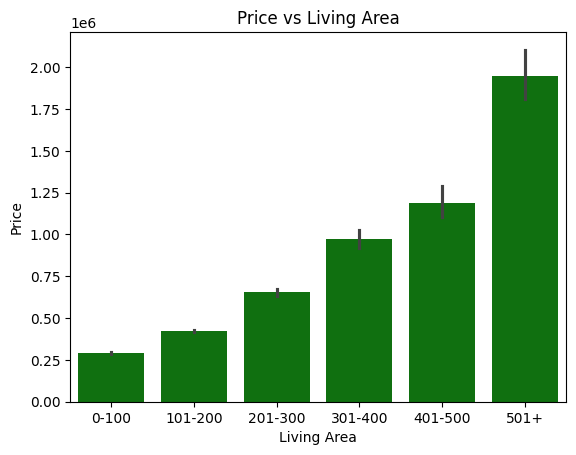

In [38]:
#defining bins and label for in new column:
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-100', '101-200', '201-300','301-400', '401-500', '501+']
assert len(labels) == len(bins) - 1

#make a new column: categorising Living Area
data["LivingAreaCat"] = pd.cut(data['LivingArea'],bins=bins, labels=labels)
sns.barplot(data=data, x="LivingAreaCat", y="Price", color="green")

#customize plt
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Price vs Living Area')
plt.show()

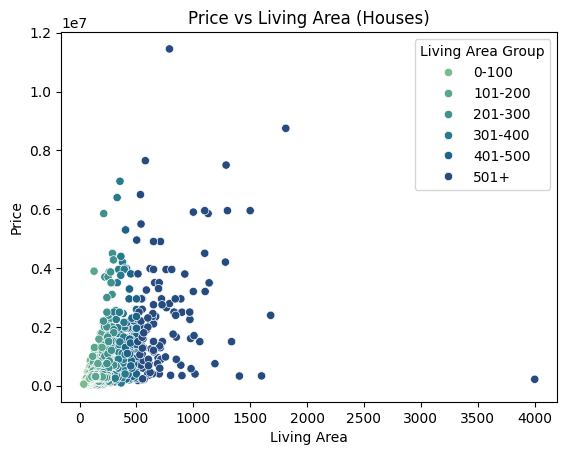

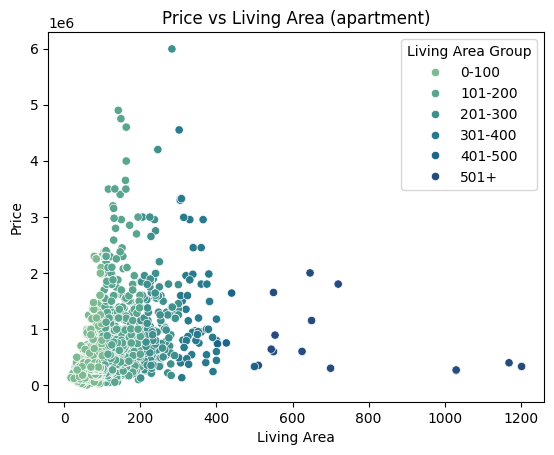

In [42]:
#defining bins and label for in new column:
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-100', '101-200', '201-300','301-400', '401-500', '501+']
assert len(labels) == len(bins) - 1
#cutting outliners:
#df = data[data['LivingArea'] <= 500]
#make a new column: categorising Living Area
data["LivingAreaCat"] = pd.cut(data['LivingArea'],bins=bins, labels=labels)

#visuals for houses
houses_data = data[data['PropertySubType'] == 'House']
sns.scatterplot(data=houses_data, x="LivingArea", y="Price", hue='LivingAreaCat',palette='crest')

plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Price vs Living Area (Houses)')
plt.legend(title='Living Area Group')
plt.show()


#visuals for apartments
app_data = data[data['PropertySubType'] == 'Apartment']
sns.scatterplot(data=app_data, x="LivingArea", y="Price", hue='LivingAreaCat',palette='crest')

#customize plt
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Price vs Living Area (apartment)')
plt.legend(title='Living Area Group')
plt.show()